# K Means Clustering on Iris Dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [5]:
data = pd.read_csv('Iris.csv')
data = data.drop('Id', axis=1) # get rid of the Id column - don't need it
data.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
105,7.6,3.0,6.6,2.1,Iris-virginica
1,4.9,3.0,1.4,0.2,Iris-setosa
51,6.4,3.2,4.5,1.5,Iris-versicolor
66,5.6,3.0,4.5,1.5,Iris-versicolor
60,5.0,2.0,3.5,1.0,Iris-versicolor


## EDA

In [6]:
data["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Data Visualisation

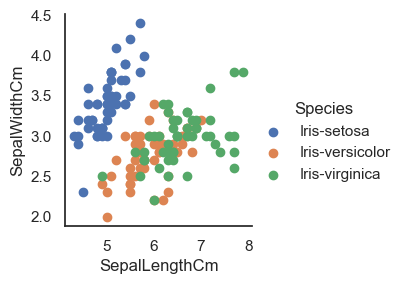

In [7]:
# SPECIES
sns.FacetGrid(data, hue="Species") \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

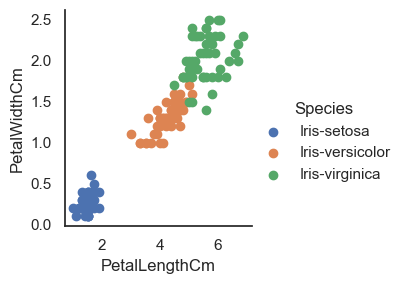

In [8]:
# PETALS
sns.FacetGrid(data, hue="Species") \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend()

note that the species are nearly linearly separable with petal size, but sepal sizes are more mixed

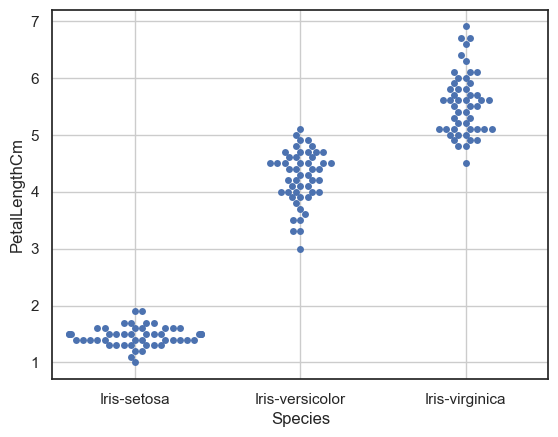

In [9]:
# petal length distributions in a swarm plot
sns.swarmplot(x="Species", y="PetalLengthCm", data=data)
plt.grid()

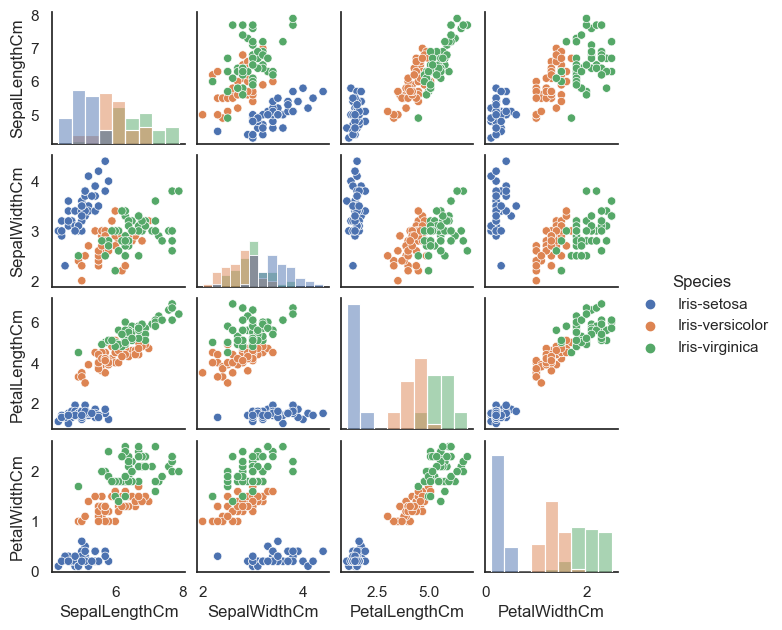

In [10]:
# scatter matrix showing each pair of features in the data.
sns.pairplot(data, hue="Species", diag_kind="hist", size=1.6)

So again, this shows how similar versicolor and virginica are, at least with the given features.
You need to have the right features to separate the groups in the best way.

## Feature Scaling

In [11]:
X = data.iloc[:,0:4]
y = data.iloc[:,-1]
print(X.sample(5))
print(y.sample(5))

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
99             5.7           2.8            4.1           1.3
107            7.3           2.9            6.3           1.8
129            7.2           3.0            5.8           1.6
141            6.9           3.1            5.1           2.3
66             5.6           3.0            4.5           1.5
118     Iris-virginica
22         Iris-setosa
139     Iris-virginica
97     Iris-versicolor
147     Iris-virginica
Name: Species, dtype: object


In [13]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

X_scaled_array = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

X_scaled.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
112,1.159173,-0.124958,0.990221,1.185010
24,-1.264185,0.800654,-1.056944,-1.312977
120,1.280340,0.337848,1.103953,1.447956
102,1.522676,-0.124958,1.217684,1.185010
58,0.916837,-0.356361,0.478430,0.133226


## K-Means Clustering

In [14]:
from sklearn.cluster import KMeans

nclusters = 2
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)

KMeans(n_clusters=2, random_state=0)

In [16]:
X_scaled.shape

(150, 4)

## Prediction

In [17]:
y_cluster_kmeans = km.predict(X_scaled_array)
y_cluster_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Evaluation 

In [18]:
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
score

0.580184463257396

<Axes: ylabel='Density'>

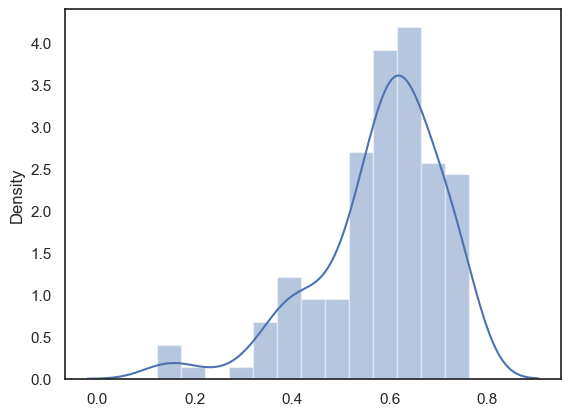

In [19]:
scores = metrics.silhouette_samples(X_scaled, y_cluster_kmeans)
sns.distplot(scores)

array([[<Axes: title={'center': 'Iris-setosa'}>,
        <Axes: title={'center': 'Iris-versicolor'}>],
       [<Axes: title={'center': 'Iris-virginica'}>, <Axes: >]],
      dtype=object)

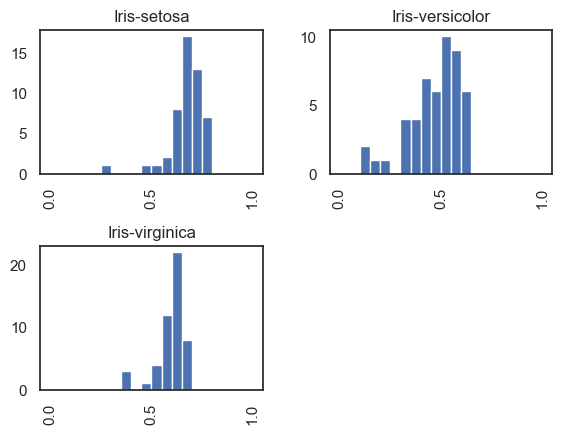

In [20]:
# plotting them separately using pandas - 
df_scores = pd.DataFrame()
df_scores['SilhouetteScore'] = scores
df_scores['Species'] = data['Species']
df_scores.hist(by='Species', column='SilhouetteScore', range=(0,1.0), bins=20)

So as expected, versicolor and virginica have lower silhouette scores than  the more separate setosas, because they are closer together.

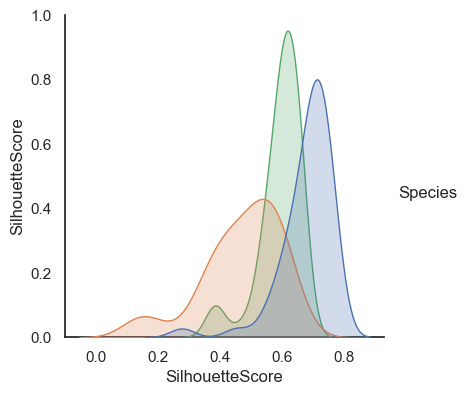

In [21]:
sns.pairplot(df_scores, hue="Species", size=4)

So we can see that the blue species have higher silhouette scores

note that if we used the best mean silhouette score to try to find the best
number of clusters k, we'd end up with 2 clusters, because the mean silhouette 
score in that case would be largest, since the clusters would be better separated. 